# Learning Curve

## Setting up

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Load data
dataObj = load_breast_cancer()
X = dataObj.data
y = dataObj.target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    stratify=y,
    test_size=0.30,
    random_state=1)

# Constructing a pipeline object (without PCA)
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=1, max_iter=10000))])

# Constructing a pipeline object (with PCA)
#pipe_lr = Pipeline([('scl', StandardScaler()),
#                    ('pca', PCA(n_components=2)),
#                    ('clf', LogisticRegression(random_state=1, max_iter=10000))])

In [2]:
# Different percentage of data used to construct a learning curve
train_size = np.linspace(0.1, 1.0, 10)
print(train_size)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [3]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=train_size,
                               cv=10,
                               n_jobs=1)

In [4]:
# Number of training samples
print(train_sizes)

[ 35  71 107 143 179 214 250 286 322 358]


In [5]:
# Training accuracy
df = pd.DataFrame(train_scores)
df.insert(loc=0, column="n_samples", value=train_sizes)
df = df.set_index("n_samples")
display(df)

,0,1,2,3,4,5,6,7,8,9
n_samples,,,,,,,,,,
35,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
71,1.000000,0.985915,0.985915,0.985915,0.985915,0.985915,0.985915,0.985915,0.985915,0.985915
107,1.000000,0.990654,0.990654,0.990654,0.990654,0.990654,0.990654,0.990654,0.990654,0.990654
143,1.000000,0.993007,0.993007,0.993007,0.993007,0.993007,0.993007,0.993007,0.993007,0.993007
179,1.000000,0.994413,0.994413,0.994413,0.994413,0.994413,0.994413,0.994413,0.994413,0.994413
214,0.990654,0.981308,0.985981,0.990654,0.985981,0.990654,0.995327,0.995327,0.995327,0.995327
250,0.992000,0.988000,0.988000,0.992000,0.988000,0.992000,0.996000,0.996000,0.996000,0.996000
286,0.989510,0.989510,0.989510,0.989510,0.986014,0.989510,0.989510,0.993007,0.993007,0.993007
322,0.990683,0.990683,0.987578,0.990683,0.987578,0.990683,0.990683,0.993789,0.990683,0.990683


In [6]:
# Validation accuracy
df = pd.DataFrame(val_scores)
df.insert(loc=0, column="n_samples", value=train_sizes)
df = df.set_index("n_samples")
display(df)

,0,1,2,3,4,5,6,7,8,9
n_samples,,,,,,,,,,
35,0.975,0.950,1.000,0.975,0.900,0.900,0.925,0.950,0.948718,0.948718
71,0.975,0.975,1.000,0.950,0.950,0.875,0.975,0.975,0.948718,0.974359
107,0.975,0.975,1.000,0.950,0.950,0.900,0.975,0.975,0.948718,0.974359
143,0.975,1.000,1.000,0.950,0.950,0.900,0.950,0.975,0.948718,0.974359
179,0.975,0.975,1.000,1.000,0.975,0.925,0.975,0.975,1.000000,1.000000
214,0.975,0.975,0.975,1.000,1.000,0.925,0.975,0.975,1.000000,1.000000
250,0.975,0.975,1.000,1.000,1.000,0.925,0.975,0.975,1.000000,1.000000
286,0.975,0.975,1.000,1.000,1.000,0.925,0.975,0.975,1.000000,1.000000
322,0.950,1.000,1.000,1.000,1.000,0.925,0.975,0.975,1.000000,1.000000


In [7]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

In [8]:
df = pd.DataFrame( \
    data=np.stack((train_sizes, train_mean, train_std, val_mean, val_std), axis=1),
    columns=['n_samples','train_mean','train_std','val_mean','val_std'])
df = df.set_index('n_samples')
display(df)

,train_mean,train_std,val_mean,val_std
n_samples,,,,
35.0,1.000000,0.000000,0.947244,0.030500
71.0,0.987324,0.004225,0.959808,0.032028
107.0,0.991589,0.002804,0.962308,0.025652
143.0,0.993706,0.002098,0.962308,0.027983
179.0,0.994972,0.001676,0.980000,0.021794
214.0,0.990654,0.004673,0.980000,0.021794
250.0,0.992400,0.003323,0.982500,0.022500
286.0,0.990210,0.002098,0.982500,0.022500
322.0,0.990373,0.001672,0.982500,0.025125


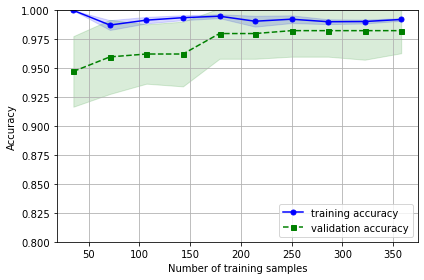

In [9]:
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 val_mean + val_std,
                 val_mean - val_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()